## Importing data from csv files, reviewing it and exporting it to CSV files

In [1]:
import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
database = pd.read_csv("Data/globalsuperstore.csv")

## database


Questions to answer

Which regional manager is the most profitable?

Which region is the most efficient (%)?

Shipping cost by region/country/market/city

Sales by product(Category)

Sales by product(Segment)

Sales by product(Sub-Category)

% returns


In [3]:
database.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
database.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
database_null = pd.isnull(database)

   

In [6]:
# Display just the headers
for col in database.columns:
    print(col)
    
    # two additional options to show just the headers
    # list(database.columns)
    # list(database.columns.values.tolist())

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


The following columns might not be relevant for the analysis:

- Row ID
- Order ID *
- Customer ID


In [7]:
# Dropping unnecessary columns
database_cleaned01 = database.drop(['Row ID', 'Customer ID', 'Order ID'], axis = 1)
database_cleaned01

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,7/31/2012,7/31/2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,10/17/2013,10/18/2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,1/28/2013,1/30/2013,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,11/5/2013,11/6/2013,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,6/19/2014,6/19/2014,Same Day,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,6/20/2014,6/24/2014,Standard Class,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,12/2/2013,12/2/2013,Same Day,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,2/18/2012,2/22/2012,Standard Class,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [8]:
database_cleaned02 = database.drop(['Row ID', 'Customer ID'], axis = 1)
database_cleaned02

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,7/31/2012,7/31/2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,10/17/2013,10/18/2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,1/28/2013,1/30/2013,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,11/5/2013,11/6/2013,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,6/19/2014,6/19/2014,Same Day,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,US-2014-102288,6/20/2014,6/24/2014,Standard Class,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,US-2013-155768,12/2/2013,12/2/2013,Same Day,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [9]:
region_df=database.groupby('Region').sum().sort_values('Profit',ascending=False)
#x['Quantity']/x['Shipping Cost']
region_df=region_df.reset_index()
region_df=region_df.drop(columns=['Row ID','Postal Code'])
region_df

,Region,Sales,Quantity,Discount,Profit,Shipping Cost
0,Central,2.822303e+06,41762,1543.610,311403.98164,296940.56
1,North,1.248166e+06,18021,459.630,194597.95252,131474.09
2,North Asia,8.483098e+05,8851,113.900,165578.42100,95030.61
3,South,1.600907e+06,25206,990.438,140355.76618,168474.07
4,Central Asia,7.528266e+05,7715,138.200,132480.18700,77830.15
5,Oceania,1.100185e+06,12838,534.100,120089.11200,120628.51
6,West,7.254578e+05,12266,350.200,108418.44890,76512.26
7,East,6.787812e+05,10618,414.000,91522.78000,72743.62
8,Africa,7.837732e+05,10564,718.800,88871.63100,88139.47
9,EMEA,8.061613e+05,11517,986.100,43897.97100,88375.73


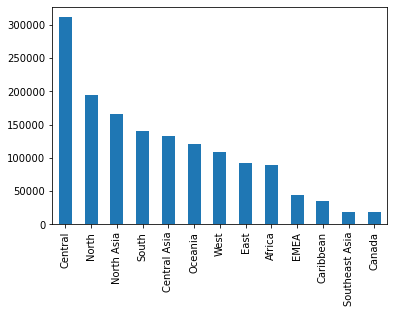

In [10]:
region_df['Profit'].plot(kind='bar',x=region_df['Region'])
plt.xticks(list(range(13)),region_df['Region'])
plt.show()

In [11]:
category=database.groupby('Category').sum().sort_values('Profit',ascending=False)
#x['Quantity']/x['Shipping Cost']
category=category.reset_index()
category=category.drop(columns=['Row ID','Postal Code'])
category

,Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,Technology,4.744557e+06,35176,1372.508,663778.73318,507048.74
1,Office Supplies,3.787070e+06,108182,4297.190,518473.83430,405451.29
2,Furniture,4.110874e+06,34954,1660.030,285204.72380,440320.66


In [12]:
subcategory=database.groupby(['Sub-Category','Market']).sum().sort_values('Profit',ascending=False)
#x['Quantity']/x['Shipping Cost']
subcategory=subcategory.reset_index()
subcategory=subcategory.drop(columns=['Row ID','Postal Code'])
subcategory

,Sub-Category,Market,Sales,Quantity,Discount,Profit,Shipping Cost
0,Phones,APAC,486354.4962,2631,79.46,81314.0562,51258.96
1,Copiers,APAC,494593.6752,2385,75.66,80854.0452,56307.32
2,Bookcases,APAC,504823.0785,2361,71.47,67656.5085,53175.64
3,Chairs,APAC,512974.1982,3594,120.02,62202.0882,57237.31
4,Bookcases,EU,363525.6990,1785,54.90,56407.2690,39724.98
...,...,...,...,...,...,...,...
114,Bookcases,US,114879.9963,868,48.14,-3472.5560,11681.43
115,Tables,LATAM,144880.3280,628,58.10,-12305.8520,15466.82
116,Tables,US,206965.5320,1241,83.35,-17725.4811,22314.05
117,Tables,APAC,225098.8119,684,63.12,-20128.7481,24572.59


In [14]:
# data=database.groupby([database['Order Date'].map(lambda x: x.year),"Category"]).sum()
# data=data.reset_index(level='Order Date')
# data

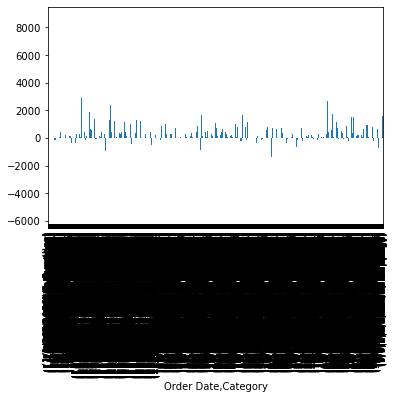

In [16]:
data=database.groupby([database['Order Date'],"Category"]).sum()
data['Profit'].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [18]:
# data1=database.groupby([database['Order Date'].map(lambda x: x.year),"Sub-Category",'Market']).sum()
data1=database.groupby([database['Order Date'],"Sub-Category",'Market']).sum()
data1=data1.reset_index()

In [19]:
market_df=database.groupby('Market').sum().sort_values('Profit',ascending=False)
#x['Quantity']/x['Shipping Cost']
market_df=market_df.reset_index()
market_df=market_df.drop(columns=['Row ID','Postal Code'])
market_df

,Market,Sales,Quantity,Discount,Profit,Shipping Cost
0,APAC,3.585744e+06,41226,1637.530,436000.04900,387165.11
1,EU,2.938089e+06,37773,1031.050,372829.74150,309422.35
2,US,2.297201e+06,37873,1561.090,286397.02170,238173.79
3,LATAM,2.164605e+06,38526,1395.158,221643.48708,234138.61
4,Africa,7.837732e+05,10564,718.800,88871.63100,88139.47
5,EMEA,8.061613e+05,11517,986.100,43897.97100,88375.73
6,Canada,6.692817e+04,833,0.000,17817.39000,7405.63


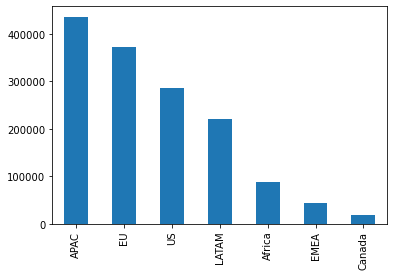

In [20]:
market_df['Profit'].plot(kind='bar',x=market_df['Market'])
plt.xticks(list(range(7)),market_df['Market'])
plt.show()

In [21]:
database['Order Date']=pd.to_datetime(database['Order Date'])
month_df=database.resample('MS', on='Order Date').sum()
month_df.drop(columns=['Row ID','Postal Code'])


,Sales,Quantity,Discount,Profit,Shipping Cost
Order Date,,,,,
2011-01-01,98898.48886,1463,68.758,8321.80096,10544.82
2011-02-01,91152.15698,1224,52.252,12417.90698,10681.21
2011-03-01,145729.36736,1836,74.212,15303.56826,13096.24
2011-04-01,116915.76418,2020,80.782,12902.32438,12954.59
2011-05-01,146747.83610,2013,82.382,12183.82870,16443.21
2011-06-01,215207.38022,3112,159.534,23415.24702,23813.22
2011-07-01,115510.41912,1774,80.086,5585.00352,11844.48
2011-08-01,207581.49122,3035,121.462,23713.66772,22001.17
2011-09-01,290214.45534,3707,137.678,35776.88394,29664.94


<function matplotlib.pyplot.show(close=None, block=None)>

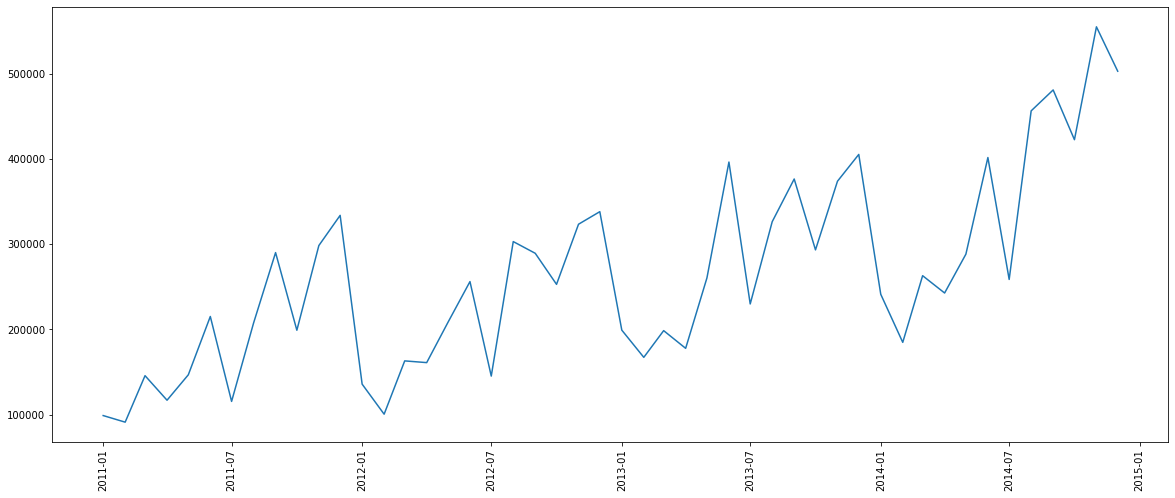

In [22]:
fig=plt.figure(figsize=(20,8))
plt.plot(month_df['Sales'])
plt.xticks(rotation=90)
plt.show

### Initial findings:

##### - Sales indicated by Category and Sub-category
##### - International shipping
##### - Shipping priority
##### - It seems the company is based in the US with no overseas branches
##### - The database also reflects the profitability, wins and loses

------------------------------------------------------

## returns

In [23]:
returns = pd.read_csv("Data/globalsuperstore_returns.csv")
returns

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU
...,...,...,...
1168,Yes,ES-2013-2639112,EU
1169,Yes,CA-2014-134194,United States
1170,Yes,ES-2012-3246286,EU
1171,Yes,ES-2012-4379168,EU


In [24]:
returns.describe()

,Returned,Order ID,Market
count,1173,1173,1173
unique,1,1172,4
top,Yes,US-2014-136679,LATAM
freq,1173,2,297


In [25]:
returns_null = pd.isnull(returns)
returns_null

,Returned,Order ID,Market
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1168,False,False,False
1169,False,False,False
1170,False,False,False
1171,False,False,False


---------------------------

## territory managers

In [26]:
territory_managers = pd.read_csv("Data/globalsuperstore_people.csv")
territory_managers

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa
5,Larry Hughes,AMEA
6,Nicole Hansen,Canada
7,Giulietta Dortch,Caribbean
8,Nora Preis,Central Asia
9,Jack Lebron,North


In [27]:
# Renaming the column Person to Territory Manager
territory_managers_df = territory_managers.rename(columns={"Person": "Territory Manager"})
territory_managers_df

,Territory Manager,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa
5,Larry Hughes,AMEA
6,Nicole Hansen,Canada
7,Giulietta Dortch,Caribbean
8,Nora Preis,Central Asia
9,Jack Lebron,North


----------------------------------------------------------------------

# Merging dataframes

In [28]:
# merging the database_cleaned01 with the territory_managers_df
# this dataset contains only sales information without taking care of the Order ID, Row ID or Customer ID
merged_sales_dataset = pd.merge(database_cleaned01, territory_managers_df, on=['Region'])
merged_sales_dataset

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,Market,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Territory Manager
0,7/31/2012,7/31/2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,Kelly Williams
1,9/14/2011,9/14/2011,Same Day,Darrin Martin,Consumer,New York City,New York,United States,10009.0,US,...,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.0,1371.9804,675.15,High,Kelly Williams
2,6/16/2012,6/19/2012,First Class,Lena Creighton,Consumer,New York City,New York,United States,10009.0,US,...,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3050.376,3,0.2,1143.8910,632.05,High,Kelly Williams
3,11/8/2012,11/8/2012,Same Day,Keith Dawkins,Corporate,New York City,New York,United States,10024.0,US,...,Technology,Machines,Zebra ZM400 Thermal Label Printer,4643.800,4,0.0,2229.0240,607.34,Medium,Kelly Williams
4,8/18/2014,8/23/2014,Second Class,Tom Prescott,Consumer,Philadelphia,Pennsylvania,United States,19134.0,US,...,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.8820,566.65,Medium,Kelly Williams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46256,8/6/2014,8/8/2014,Second Class,Dorothy Wardle,Corporate,Richmond,British Columbia,Canada,NaN,Canada,...,Office Supplies,Binders,"Avery Binder, Recycled",26.520,2,0.0,12.1800,0.39,High,Nicole Hansen
46257,9/21/2011,9/24/2011,Second Class,Alan Shonely,Consumer,Vaughan,Ontario,Canada,NaN,Canada,...,Office Supplies,Labels,"Smead Round Labels, Adjustable",4.800,1,0.0,1.4400,0.35,Medium,Nicole Hansen
46258,11/20/2012,11/26/2012,Standard Class,Janet Lee,Consumer,Laval,Quebec,Canada,NaN,Canada,...,Office Supplies,Fasteners,"Stockwell Paper Clips, Metal",12.930,1,0.0,0.3600,0.15,Medium,Nicole Hansen
46259,9/17/2014,9/21/2014,Standard Class,Kean Takahito,Consumer,Mississauga,Ontario,Canada,NaN,Canada,...,Office Supplies,Binders,"Ibico Hole Reinforcements, Economy",6.990,1,0.0,3.4200,0.15,Medium,Nicole Hansen


In [29]:
# merging the database_cleaned02 with the returns
# this dataset includes the Order ID to analyze the returns
merged_returned_orders = pd.merge(database_cleaned02, returns, on=['Order ID'])
merged_returned_orders

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y
0,IN-2013-77878,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,APAC
1,IN-2013-77878,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,...,Copiers,"Brother Fax and Copier, Laser",344.682,2,0.1,34.4220,65.35,Critical,Yes,APAC
2,IN-2013-77878,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,...,Storage,"Rogers Folders, Wire Frame",133.920,5,0.1,-6.0300,41.64,Critical,Yes,APAC
3,IN-2013-77878,2/5/2013,2/7/2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,...,Accessories,"Enermax Flash Drive, Erganomic",70.794,2,0.1,25.1340,10.48,Critical,Yes,APAC
4,ES-2014-1651774,9/8/2014,9/14/2014,Standard Class,Patrick Jones,Corporate,Prato,Tuscany,Italy,NaN,...,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.0800,778.32,Low,Yes,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,CA-2014-157196,11/6/2014,11/10/2014,Standard Class,Anna Andreadi,Consumer,San Diego,California,United States,92105.0,...,Paper,Xerox 1996,12.960,2,0.0,6.2208,0.23,Medium,Yes,United States
3051,ES-2014-4359397,8/7/2014,8/10/2014,First Class,Tony Molinari,Consumer,Harrow,England,United Kingdom,NaN,...,Envelopes,"GlobeWeis Clasp Envelope, Recycled",26.100,3,0.0,6.7500,0.18,Medium,Yes,EU
3052,CA-2014-154214,3/21/2014,3/26/2014,Second Class,Troy Blackwell,Consumer,Columbus,Indiana,United States,47201.0,...,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2.910,1,0.0,1.3677,0.18,Medium,Yes,United States
3053,CA-2013-105291,10/31/2013,11/5/2013,Standard Class,Susan Pistek,Consumer,San Luis Obispo,California,United States,93405.0,...,Fasteners,Assorted Color Push Pins,3.620,2,0.0,1.1946,0.15,Medium,Yes,United States


In [30]:
merged_returned_orders.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,804.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,70234.339552,268.336622,3.857283,0.112710,38.624820,29.164282
std,31258.748071,523.339484,2.290164,0.176957,212.899687,58.382261
min,1852.000000,1.680000,1.000000,0.000000,-3701.892800,0.010000
25%,43229.000000,34.990000,2.000000,0.000000,1.420000,2.965000
50%,90006.000000,97.824000,3.000000,0.000000,12.712000,9.050000
75%,94109.000000,290.683000,5.000000,0.200000,42.690000,29.030000
max,99207.000000,13999.960000,14.000000,0.800000,6719.980800,923.630000


-----------------------------------------------------------------

### Exporting to CSV files for other applications

In [33]:
# To a CSV file
merged_sales_dataset.to_csv('Data/merged_sales_dataset.csv')
merged_returned_orders.to_csv('Data/merged_returned_orders.csv')
month_df.to_csv('Data/performance_by_month.csv')
region_df.to_csv('Data/performance_by_region.csv')
category.to_csv('Data/performance_by_category.csv')

In [32]:
# these CSV files contains the merged data from the different DataFrames